In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('dark_background')
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#changing salary to be int type as the column has no float values

salary_data['Salary'] = salary_data['Salary'].astype('int64')

In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
# to check for null values
salary_data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [8]:
# to check for duplicated values
salary_data.duplicated().any()

False

In [9]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## EDA

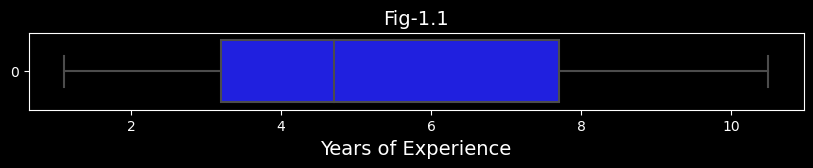

In [10]:
# for years of experience column
plt.figure(figsize=(10,1))
sns.boxplot(salary_data['YearsExperience'], orient='h',color='b')
plt.xlabel('Years of Experience')
plt.title('Fig-1.1')
plt.show()

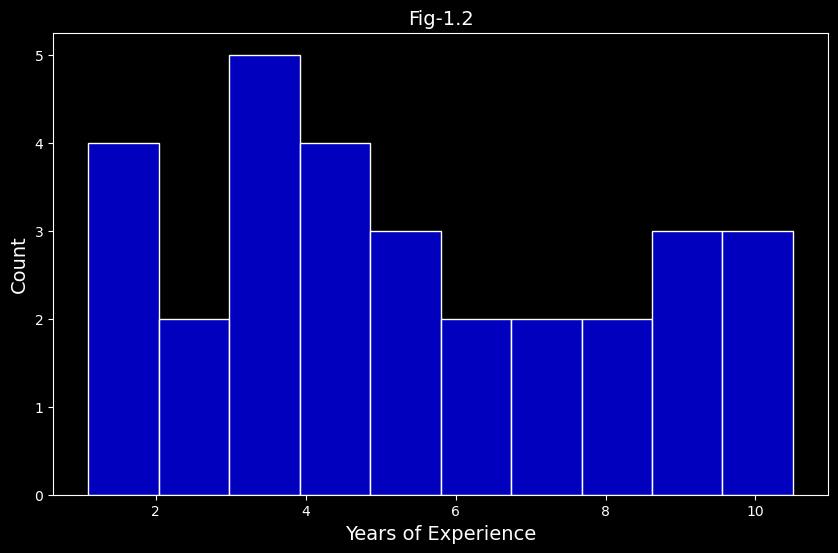

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(salary_data['YearsExperience'],bins=10,color='b')
plt.xlabel('Years of Experience')
plt.title('Fig-1.2')
plt.show()

C:\Users\Pratibha\AppData\Local\Temp\ipykernel_23276\2822905163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data['YearsExperience'],color='b')


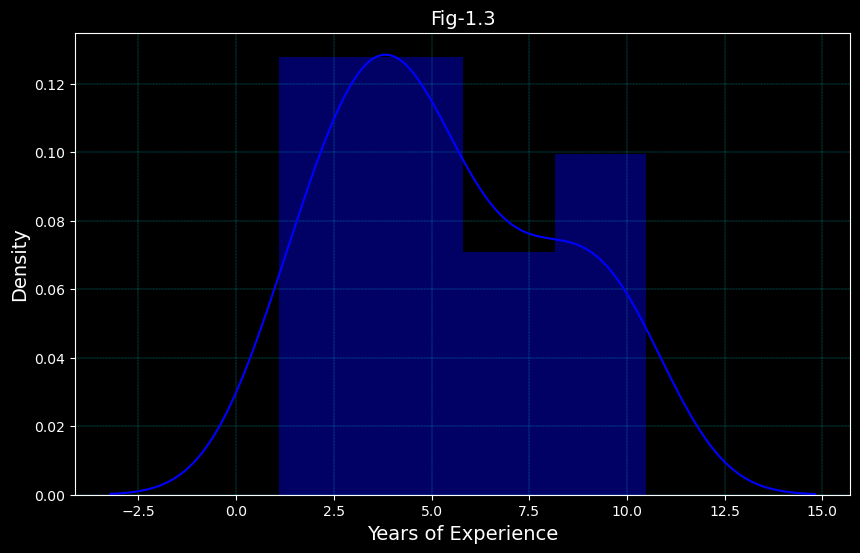

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(salary_data['YearsExperience'],color='b')
plt.xlabel('Years of Experience')
plt.title('Fig-1.3')
plt.grid(color='cyan',linestyle='--',linewidth=.2)
plt.show()

In [13]:
q1 = salary_data['YearsExperience'].quantile(.25)
q3 = salary_data['YearsExperience'].quantile(.75)

cdf_yrs_exp = st.norm.cdf(salary_data['YearsExperience'], salary_data['YearsExperience'].mean(), salary_data['YearsExperience'].std())
pdf_yrs_exp = st.norm.pdf(salary_data['YearsExperience'], salary_data['YearsExperience'].mean(), salary_data['YearsExperience'].std())

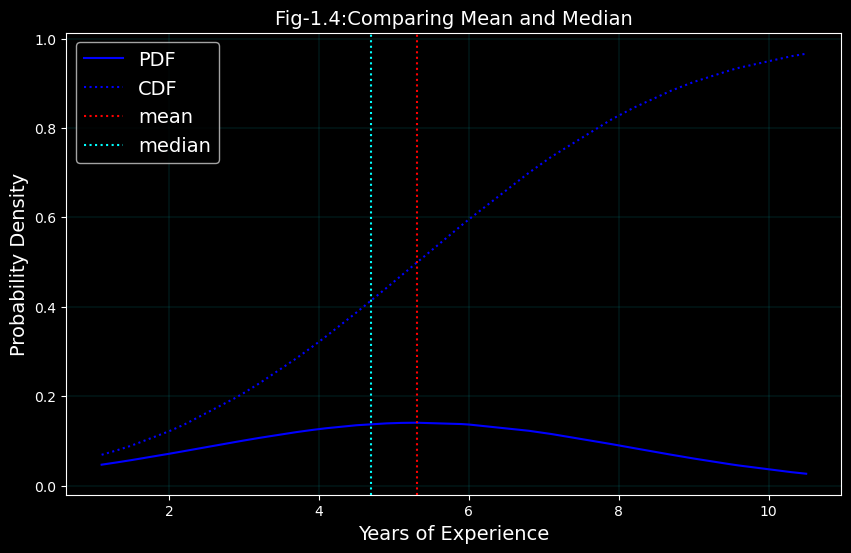

In [14]:
plt.figure(figsize=(10,6))

plt.plot(salary_data['YearsExperience'],pdf_yrs_exp,color='b',label='PDF',linestyle='solid')
plt.plot(salary_data['YearsExperience'],cdf_yrs_exp,color='b',label='CDF',linestyle=':')

plt.axvline(5.31,color='r',label='mean',linestyle='dotted')
plt.axvline(salary_data['YearsExperience'].quantile(.5),color='cyan',label='median',linestyle='dotted')
plt.xlabel("Years of Experience")
plt.ylabel("Probability Density")
plt.title("Fig-1.4:Comparing Mean and Median")
plt.grid(color='cyan', linestyle='-', linewidth=.1)
plt.legend()

plt.show()


In [15]:
# filtering outliers
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

mask = salary_data['YearsExperience'].between(lower_limit,upper_limit)
salary_data[~mask]


,YearsExperience,Salary


In [16]:
salary_data['YearsExperience'].skew()

0.37956024064804106

From the above analysis of YearsExperience following conclusion can be drawn:
</br>
1.There is no outliers present in this column.
</br>
2.Figure 1.2 clearly shows presence of 1-2 years and 3-5 years slightly more in comparison to other binnings.
</br>
3.Figure 1.3 shows slightly right skewed data.
</br>
4.It can be justified using figure 1.4 which shows that mean > median, and another reason could be data is biased to 1-2 years and 3-5 years.
</br>
5.As skewness is coming .37, it can be taken as almost symmetrical.    

Text(0.5, 1.0, 'Fig-2.1')

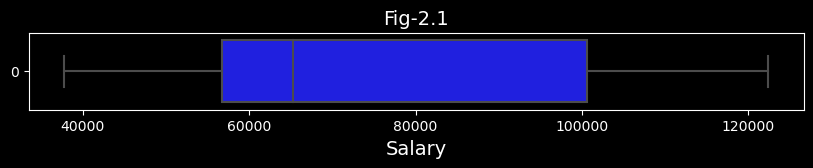

In [17]:
# for Salary Column

plt.figure(figsize=(10,1))
sns.boxplot(salary_data['Salary'],orient='h',color='b')
plt.xlabel('Salary')
plt.title('Fig-2.1')

In [18]:
# filtering outliers

q3 = salary_data['Salary'].quantile(.75)
q1 = salary_data['Salary'].quantile(.25)

iqr = q3 - q1

upper_limit = q3 + (iqr * 1.5)
lower_limit = q1 - (iqr * 1.5)

mask1 = salary_data['Salary'].between(lower_limit, upper_limit)
salary_data[~mask1]

,YearsExperience,Salary


C:\Users\Pratibha\AppData\Local\Temp\ipykernel_23276\3177100728.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data['Salary'],bins=7,color='b',norm_hist=True)


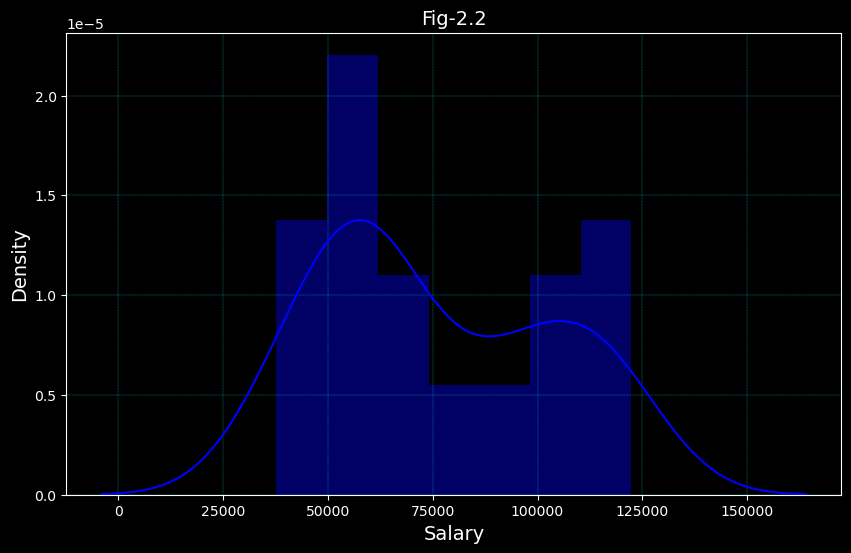

In [19]:
plt.figure(figsize=(10,6))

sns.distplot(salary_data['Salary'],bins=7,color='b',norm_hist=True)
plt.grid(color='cyan',linestyle="--",linewidth=.2)
plt.title('Fig-2.2')
plt.show()

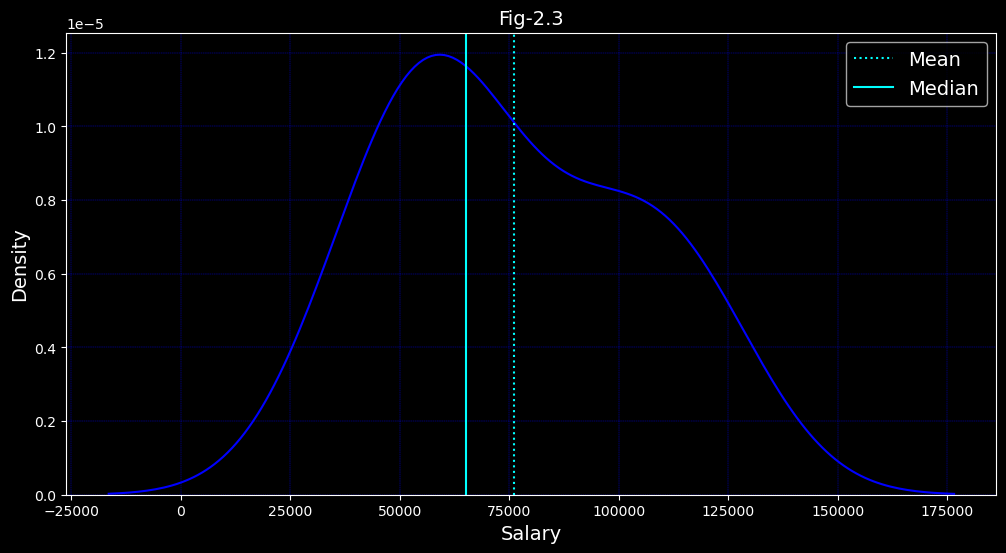

In [52]:
plt.figure(figsize=(12,6))

sns.kdeplot(salary_data['Salary'],color='b',bw_adjust=1.3)
plt.axvline(salary_data['Salary'].mean(),color='cyan',label="Mean",linestyle='dotted')
plt.axvline(salary_data['Salary'].quantile(.5),label='Median',color='cyan')
plt.grid(color='b', linestyle='--', linewidth=.3)
plt.title('Fig-2.3')
plt.legend()

plt.show()

In [21]:
salary_data['Salary'].skew()

0.35411967922959153

From Salary column we can see that:
</br>
1.There is no outlier present in this column.
</br>
2.As this is dependent column, it follows the same trend as YearsExperience column.
</br>
3.In the figure 2.3 we can see thata mean > median. Therefore it is right skewed.
</br>
4.Skewness is coming out be .35 which can be ignored.

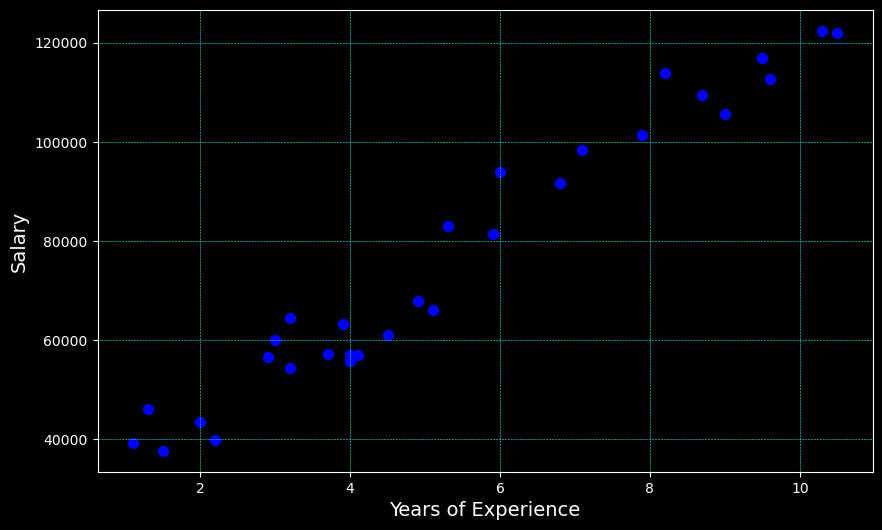

In [22]:
# EDA for YearsExperience and Salary column

plt.figure(figsize=(10,6))

plt.scatter(salary_data['YearsExperience'],salary_data['Salary'],color='b',s=50)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(color='cyan',linestyle='--',linewidth=.4)

plt.show()

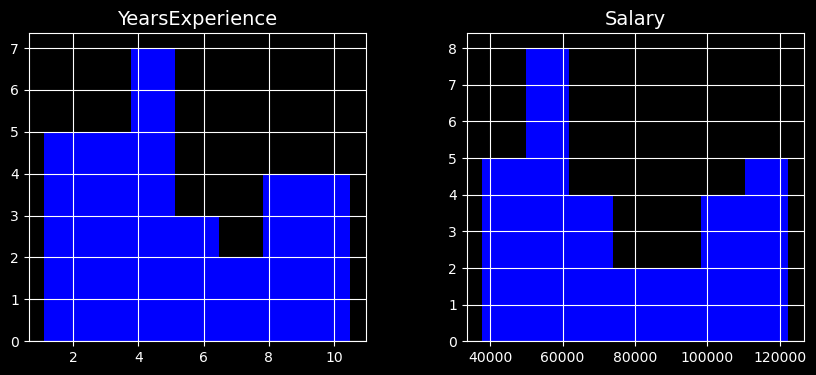

In [66]:
salary_data.hist(bins=7,color='blue',figsize=(10,4))
plt.show()

In [30]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Spliting Data into Treain Test & Building Model

In [45]:
from sklearn.model_selection import train_test_split

X = salary_data.drop('Salary',axis=1)
y = salary_data.drop('YearsExperience',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

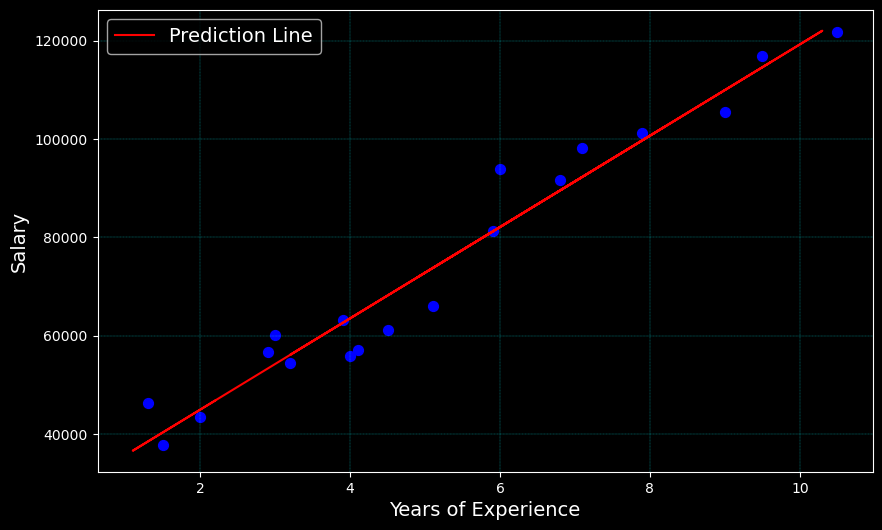

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,color='b',s=50)
plt.plot(X_test,y_pred,color='r',label='Prediction Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(color='cyan',linestyle='--',linewidth=.2)
plt.show

In [68]:
print('Coefficient',lr.coef_)
print('Intercept',lr.intercept_)

Coefficient [[9289.03909744]]
Intercept [26357.17687535]


## Model's Performance

In [69]:
from sklearn.metrics import r2_score,mean_squared_error

In [71]:
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.9588741211444436


In [74]:
print('rmse',mean_squared_error(y_test,y_pred,squared=False))

rmse 5980.4805203227925


This model has 95.88% accuracy.